In [3]:
import urllib.request
import json
url = 'https://www.saferproducts.gov/RestWebServices/' # Location of the API
query = 'Recall?format=json&ProductType=Exercise' # The query
response = urllib.request.urlopen(url+query)
response_bytes = response.read()
data = json.loads(response_bytes) # Convert response to json
response.close()

In [5]:
import pandas as pd
df = pd.DataFrame.from_dict(data)
print(df)

    RecallID RecallNumber           RecallDate  \
0       7832        16247  2016-08-23T00:00:00   
1       6724        16742  2016-05-10T00:00:00   
2       6488        15749  2015-08-25T00:00:00   
3       6420        15735  2015-06-16T00:00:00   
4       6398        15140  2015-05-20T00:00:00   
..       ...          ...                  ...   
86      4958        90117  1990-06-28T00:00:00   
87      4957        90115  1990-06-21T00:00:00   
88      4870        89091  1989-09-26T00:00:00   
89      4796        88106  1988-11-29T00:00:00   
90      4122        81026  1981-10-13T00:00:00   

                                          Description  \
0   This recall involves "Step-iT" activity wristb...   
1   This recall involves the Olympic Decline free ...   
2   This recall involves four models of exercise m...   
3   This recall involves the Rogue Fitness Mobilit...   
4   This recall involves Valor Fitness BF-38 Flat/...   
..                                                ...   


In [6]:
df['RemedyOptions'].value_counts()

,count
RemedyOptions,
[],66
[{'Option': 'Repair'}],9
[{'Option': 'Replace'}],8
[{'Option': 'Refund'}],5
"[{'Option': 'Replace'}, {'Option': 'Refund'}]",1
"[{'Option': 'Refund'}, {'Option': 'Repair'}]",1
"[{'Option': 'New Instructions'}, {'Option': 'Repair'}]",1


In [8]:
temp = df['RemedyOptions']
clean_values = []
for i in range(len(temp)):
    if len(temp[i])>0:
        values = []
        for j in range(len(temp[i])):
            values.append(temp[i][j]['Option'] )
        clean_values.append(values)
    else:
        clean_values.append('')
df['remedy'] = clean_values

In [11]:
df['remedy'].value_counts()

,count
remedy,
,66
[Repair],9
[Replace],8
[Refund],5
"[Replace, Refund]",1
"[Refund, Repair]",1
"[New Instructions, Repair]",1


In [13]:
df.head()

,RecallID,RecallNumber,RecallDate,Description,URL,Title,ConsumerContact,LastPublishDate,Products,Inconjunctions,...,Retailers,Importers,Distributors,SoldAtLabel,ManufacturerCountries,ProductUPCs,Hazards,Remedies,RemedyOptions,remedy
0,7832,16247,2016-08-23T00:00:00,"This recall involves ""Step-iT"" activity wristb...",https://www.cpsc.gov/Recalls/2016/McDonalds-Re...,McDonald’s Recalls “Step-iT” Activity Wristban...,McDonald's at 800-244-6227 from 7 a.m. to 7 p....,2016-08-23T00:00:00,"[{'Name': 'Step-iT Activity Wristbands', 'Desc...",[{'URL': 'http://healthycanadians.gc.ca/recall...,...,[{'Name': 'Distributed exclusively by McDonald...,[],"[{'Name': 'McDonald's Corp., of Oakbrook, Ill....",None,[{'Country': 'China'}],[],[{'Name': 'The recalled wristbands can cause s...,[{'Name': 'Consumers should immediately take t...,[{'Option': 'Replace'}],[Replace]
1,6724,16742,2016-05-10T00:00:00,This recall involves the Olympic Decline free ...,https://www.cpsc.gov/Recalls/2016/Cybex-Intern...,Cybex International Recalls Decline Free Weigh...,Cybex toll-free at 888-462-9239 from 8 a.m. to...,2016-05-10T00:00:00,"[{'Name': 'Decline free weight benches', 'Desc...",[],...,[{'Name': 'Cybex direct sales force or its dis...,[],[],None,[{'Country': 'United States'}],[],[{'Name': 'The frame on the bench can collapse...,[{'Name': 'Consumers should immediately stop u...,[{'Option': 'Replace'}],[Replace]
2,6488,15749,2015-08-25T00:00:00,This recall involves four models of exercise m...,https://www.cpsc.gov/Recalls/2015/Cybex-Intern...,Cybex International Recalls Arm Curl Machines ...,Cybex International toll-free at 888-678-3846 ...,2015-08-25T00:00:00,"[{'Name': 'Arm Curl Machines', 'Description': ...",[],...,[{'Name': 'Cybex or its distributors directly ...,[],[],None,[{'Country': 'United States'}],[],[{'Name': 'The swivel handles can break off fr...,[{'Name': 'Consumers should immediately stop u...,[{'Option': 'Repair'}],[Repair]
3,6420,15735,2015-06-16T00:00:00,This recall involves the Rogue Fitness Mobilit...,https://www.cpsc.gov/Recalls/2015/Coulter-Vent...,Coulter Ventures Recalls MobilityWOD Door Anch...,Coulter toll-free at (844) 216-3846 from 9 a.m...,2015-06-16T00:00:00,"[{'Name': 'MobilityWOD Door Anchor', 'Descript...",[],...,[{'Name': 'Rogue Fitness websites: www.roguefi...,[],"[{'Name': 'Coulter Ventures LLC, dba Rogue Fit...",None,[{'Country': 'China'}],[],[{'Name': 'The nylon strap can pull out from t...,[{'Name': 'Consumers should immediately stop u...,[{'Option': 'Refund'}],[Refund]
4,6398,15140,2015-05-20T00:00:00,This recall involves Valor Fitness BF-38 Flat/...,https://www.cpsc.gov/Recalls/2015/Valor-Athlet...,Valor Athletics Recalls Olympic Weight Bench d...,Valor Fitness toll-free at (844) 277-1641 Mond...,2015-05-20T00:00:00,"[{'Name': 'Weight bench', 'Description': '', '...",[],...,[{'Name': 'Valorathleticsinc.com and Valorfitn...,"[{'Name': 'Valor Athletics Inc., of St. Peters...",[],None,[{'Country': 'China'}],[],[{'Name': 'The weld joining the front leg to t...,[{'Name': 'Consumers should immediately stop u...,[{'Option': 'Repair'}],[Repair]


In [15]:
def flatten(var):
    temp = df[var]
    clean_values = []
    key = [*temp[0][0]][0]
    for i in range(len(temp)):
        if len(temp[i])==1 :
            clean_values.append( str(temp[i][0][key]) )
        elif len(temp[i])>1:
            new_values = []
            for j in range(len(temp[i])):
                new_values.append( temp[i][j][key] )
            clean_values.append(str(new_values) )
        else:
            clean_values.append('')
    return clean_values

In [16]:
df['remedy'] = flatten('RemedyOptions')
df['remedy'].value_counts()

,count
remedy,
,66
Repair,9
Replace,8
Refund,5
"['Replace', 'Refund']",1
"['Refund', 'Repair']",1
"['New Instructions', 'Repair']",1


<Axes: >

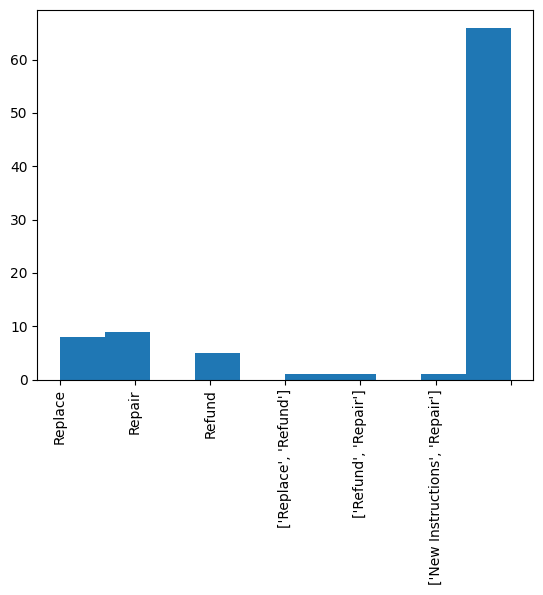

In [17]:
df['remedy'].hist(grid=False,xrot=90)